In [1]:
from sklearn import datasets # to read the breast cancer dataset
import numpy as np # math
import tensorflow as tf # deep learning
import matplotlib.pyplot as plt # the plot tool

## Load the breast cancer dataset

In [2]:
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target.reshape([-1, 1])

In [3]:
# the features and labels shape
X.shape, Y.shape

((569, 30), (569, 1))

# **Build the network**

## *The overall structure*

<img src="./imgs/DNN_ALL_cancer.png" width="60%" height="60%">

## *<span style="color:red">●Step 1</span>: Define the input and real label holders*

<img src="./imgs/DNN_xy_cancer.png" width="60%" height="60%">

In [4]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 30], name='input')
y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='prediction')

## *<span style="color:red">●Step 2</span>: Define the weight and bias creating function*

In [5]:
def _weight(shape):
    initial = tf.truncated_normal(mean=0, stddev=.5, shape=shape)
    return tf.Variable(initial)
def _bias(shape):
    initial = tf.constant(.25, shape=shape)
    return tf.Variable(initial)

## *<span style="color:red">●Step 3</span>: Input layer to the 1st hidden layer*

<img src="./imgs/DNN_input2first_cancer.png" width="60%" height="60%">

In [8]:
w_1 = _weight([30, 128])
b_1 = _bias([128])
L1 = tf.nn.relu(tf.add(tf.matmul(x, w_1), b_1))

## *<span style="color:red">●Step 4</span>: The 1st layer to the 2nd hidden layer*

<img src="./imgs/DNN_first2second_cancer.png" width="60%" height="60%">

In [11]:
w_2 = _weight([128, 128])
b_2 = _bias([128])
L2 = tf.nn.relu(tf.add(tf.matmul(L1, w_2), b_2))

## *<span style="color:red">●Step 5</span>: The 2nd layer to the output layer*

<img src="./imgs/DNN_second2output_cancer.png" width="60%" height="60%">

In [12]:
w_3 = _weight([128, 1])
b_3 = _bias([1])
_pred = tf.add(tf.matmul(L2, w_3), b_3)
pred = tf.sigmoid(_pred)

## *<span style="color:red">●Step 6</span>: The cost function and optimizer*

<img src="./imgs/DNN_cost_cancer.png" width="60%" height="60%">

In [13]:
loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=y,
                                       logits=_pred,)
op = tf.train.AdamOptimizer(learning_rate=1e-3)
update_step = op.minimize(loss)

## *<span style="color:red">●Step 7</span>: Open a new NN session and initialize the variables*

In [14]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

## *<span style="color:red">●Step 8</span>: Training and record the loss and accuracy*

In [15]:
epoch = 10
batch_size = 20
losses_train = list()
losses_test = list()
accus_train = list()
accus_test = list()
np.set_printoptions(precision=3)
for epo in range(epoch):
    # training
    for i in range(20):
        batch_x = X[i*batch_size:i*batch_size+batch_size]
        batch_y = Y[i*batch_size:i*batch_size+batch_size]
        feed_dict = {x:batch_x, y:batch_y}
        _ = sess.run([update_step], feed_dict=feed_dict)
    # evaluation
    batch_x = X[:400]
    batch_y = Y[:400]
    feed_dict = {x:batch_x, y:batch_y}
    p, l = sess.run([pred, loss], feed_dict=feed_dict)
    accu = (400 - np.sum(np.abs(batch_y - p.astype('int'))))/400
    losses_train.append(l)
    accus_train.append(accu)
    l_train = np.array([l])
    accu_train = np.array([accu])
    
    batch_x = X[400:]
    batch_y = Y[400:]
    feed_dict = {x:batch_x, y:batch_y}
    p, l = sess.run([pred, loss], feed_dict=feed_dict)
    accu = (169 - np.sum(np.abs(batch_y - p.astype('int'))))/169
    losses_test.append(l)
    accus_test.append(accu)
    l_test = np.array([l])
    accu_test = np.array([accu])
    print('Epoch:', epo+1,
          ', Loss(train):', l_train,
          ', Accu(train):', accu_train,
          ', Loss(test):', l_test,
          ', Accu(test):', accu_test)

Epoch: 1 , Loss(train): [ 784.979] , Accu(train): [ 0.568] , Loss(test): [ 451.854] , Accu(test): [ 0.769]
Epoch: 2 , Loss(train): [ 327.846] , Accu(train): [ 0.432] , Loss(test): [ 467.396] , Accu(test): [ 0.231]
Epoch: 3 , Loss(train): [ 61.271] , Accu(train): [ 0.627] , Loss(test): [ 33.272] , Accu(test): [ 0.799]
Epoch: 4 , Loss(train): [ 4.748] , Accu(train): [ 0.91] , Loss(test): [ 3.615] , Accu(test): [ 0.917]
Epoch: 5 , Loss(train): [ 5.123] , Accu(train): [ 0.86] , Loss(test): [ 11.324] , Accu(test): [ 0.746]
Epoch: 6 , Loss(train): [ 4.042] , Accu(train): [ 0.902] , Loss(test): [ 6.84] , Accu(test): [ 0.828]
Epoch: 7 , Loss(train): [ 3.873] , Accu(train): [ 0.922] , Loss(test): [ 4.667] , Accu(test): [ 0.858]
Epoch: 8 , Loss(train): [ 3.653] , Accu(train): [ 0.915] , Loss(test): [ 5.341] , Accu(test): [ 0.84]
Epoch: 9 , Loss(train): [ 3.689] , Accu(train): [ 0.922] , Loss(test): [ 3.984] , Accu(test): [ 0.876]
Epoch: 10 , Loss(train): [ 3.413] , Accu(train): [ 0.915] , Loss(t

- Plot the loss and accuracy

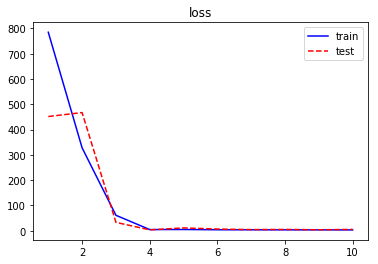

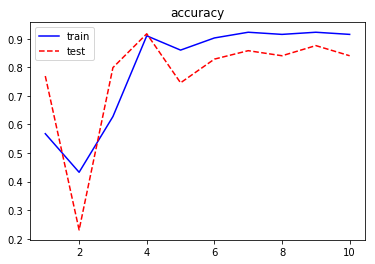

In [16]:
plt.plot(np.arange(epoch)+1, losses_train, 'b')
plt.plot(np.arange(epoch)+1, losses_test, '--r')
plt.legend(['train', 'test'])
plt.title('loss')
plt.show()

plt.plot(np.arange(epoch)+1, accus_train, 'b')
plt.plot(np.arange(epoch)+1, accus_test, '--r')
plt.legend(['train', 'test'])
plt.title('accuracy')
plt.show()